### Importing libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing Dataset

In [36]:
df = pd.read_csv("./Dataset/Hotel Reservations.csv")


In [37]:
df.head(5)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Shape of our data

In [38]:
df.shape


(36275, 19)

### Dropping the Booking_ID column as it doesen't going to add weight to predict

In [39]:
df.drop(["Booking_ID","arrival_year", "arrival_date"], inplace=True, axis="columns")


In [40]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


In [41]:
df.shape


(36275, 16)

### Checking for missing values and duplicate values

In [42]:
(df.isnull().sum() / len(df)) * 100


no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_month                           0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [43]:
df.duplicated().sum()


10477

In [44]:
df[df.duplicated()]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,10,Online,0,0,0,65.00,0,Canceled
154,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,4,Offline,0,0,0,104.00,0,Not_Canceled
272,2,0,1,2,Meal Plan 2,0,Room_Type 1,161,3,Online,0,0,0,130.00,0,Canceled
301,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,6,Online,0,0,0,130.00,0,Canceled
319,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,8,Online,0,0,0,115.00,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2,Online,0,0,0,1.00,0,Not_Canceled
36264,2,0,0,2,Meal Plan 1,0,Room_Type 4,187,7,Online,0,0,0,105.30,0,Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,7,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,11,Offline,0,0,0,110.00,0,Canceled


### Dropping those duplicates

In [45]:
df = df.drop_duplicates()


In [46]:
df.shape


(25798, 16)

In [47]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


### Encoding categorical values

#### Getting categorical values

In [48]:
categorical = []
for feature in list(zip(df.dtypes.index, df.dtypes)):
    if feature[1] == "object":
        categorical.append(feature[0])


In [49]:
print(categorical)


['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [50]:
from sklearn.preprocessing import LabelEncoder
for i in categorical:
    j = LabelEncoder()
    df[i] = j.fit_transform(df[i])

In [51]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,10,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,11,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,5,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,4,4,0,0,0,94.50,0,0


In [52]:
df.dtypes


no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_month                             int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

### Checking if the dataset is imbalanced

In [53]:
df["booking_status"].value_counts()


booking_status
1    18376
0     7422
Name: count, dtype: int64

#### Visualizing counts for target column

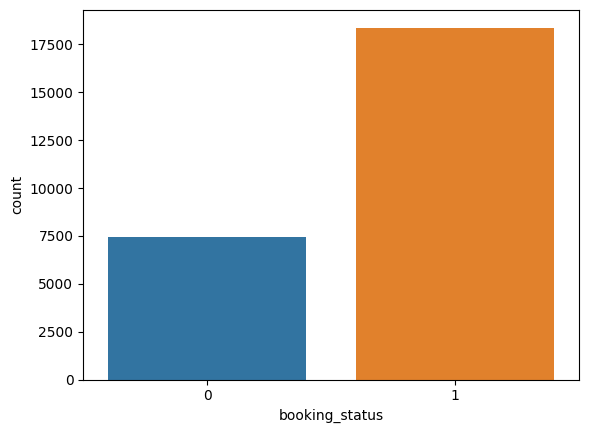

In [54]:
sns.countplot(data=df, x="booking_status")
plt.show()


#### Checking the imbalance ration already we can see it's huge

In [55]:
majority_class_samples = df["booking_status"].loc[df["booking_status"] == 1]
minority_class_samples = df["booking_status"].loc[df["booking_status"] == 0]
Imbalance_Ratio = len(majority_class_samples) / len(minority_class_samples)
print(f"Imbalance Ratio is:{Imbalance_Ratio}")


Imbalance Ratio is:2.4758825114524385


The problem with imbalance is when model will predict the minority will get dominated by the majority. We will ovbiously have to make our dataset balance later.

### Checking for outlier

We will consider removing outliers after train and test split as it will work as remedy for data leakage. I will consider using winsorize method as it will not remove those outlier instead it will replace those outlier values with the percentile range we will define. 

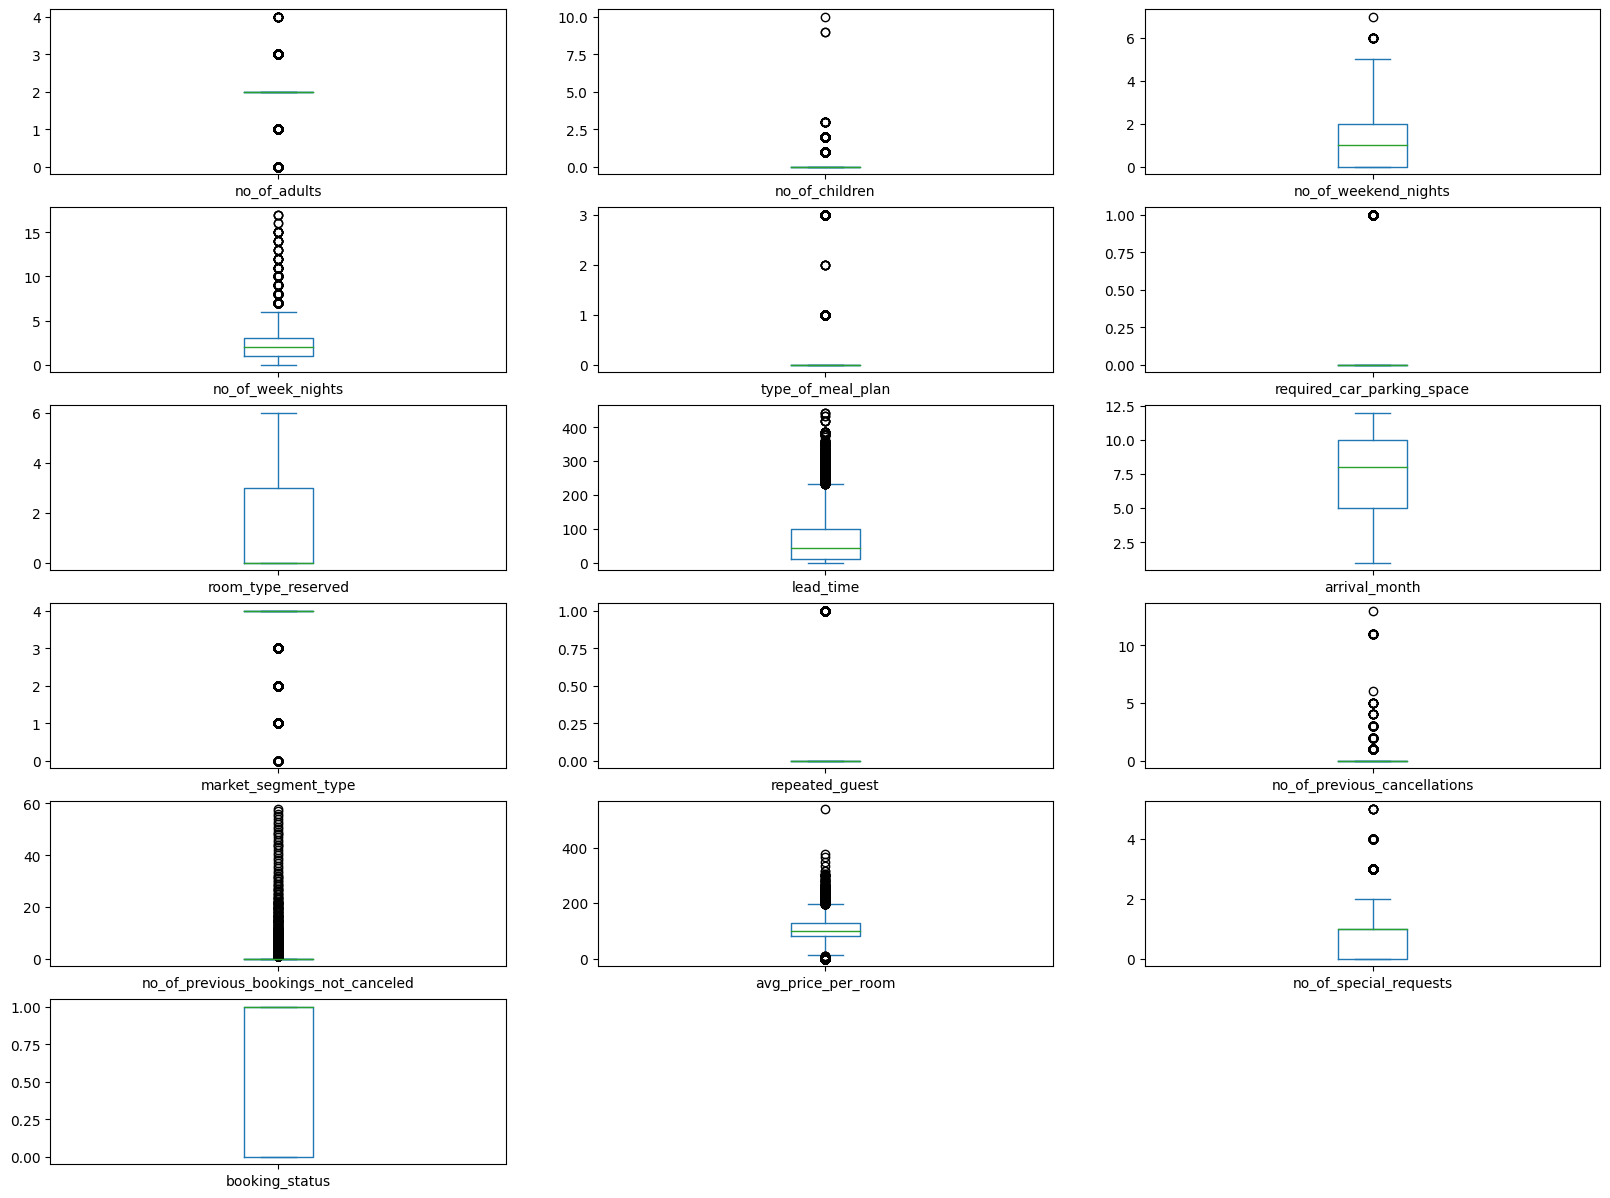

In [56]:
df.plot(
    kind="box",
    subplots=True,
    layout=(6, 3),
    sharey=False,
    sharex=False,
    figsize=(20, 15),
)
plt.show()


### Checking Correlation

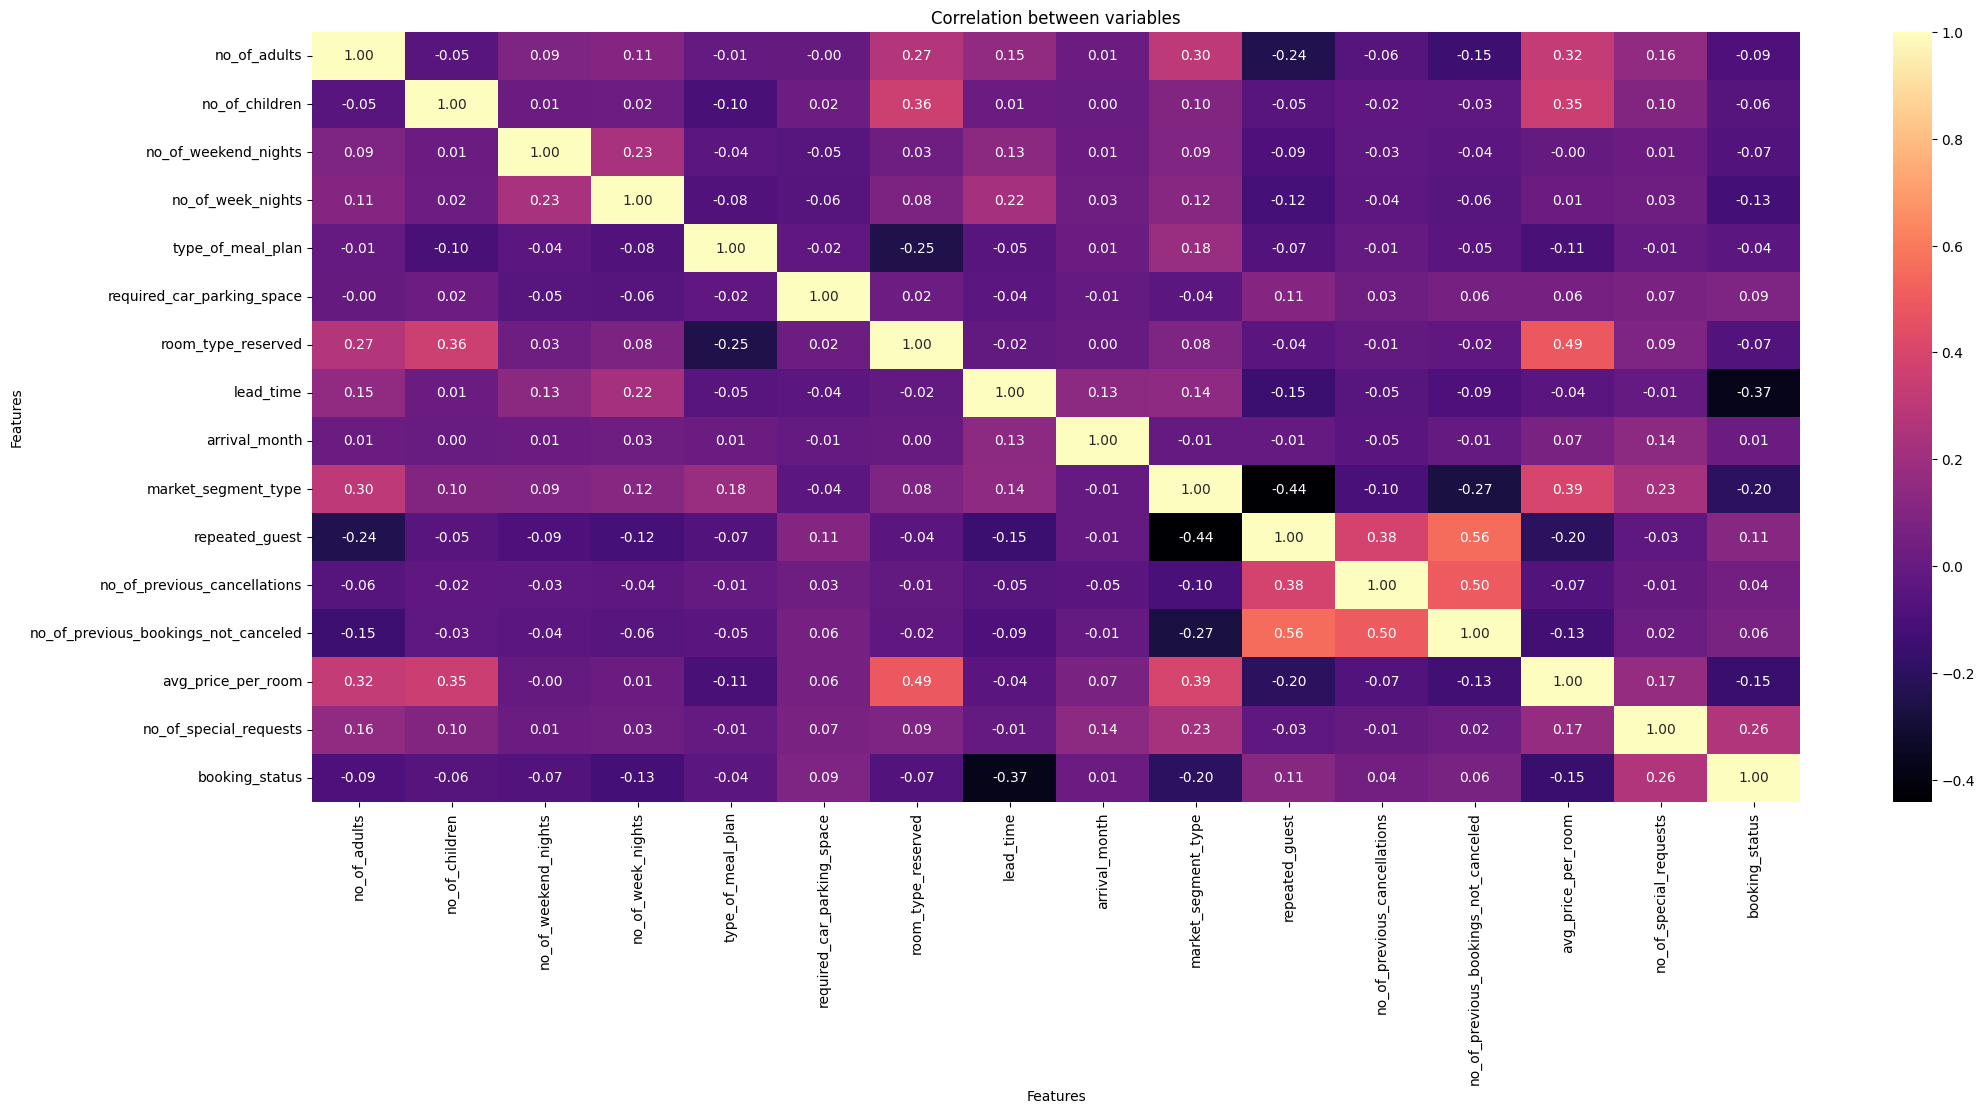

In [57]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f")
plt.gca().set_title("Correlation between variables")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


#### Correlation outcome 
     1.repeated guest / no_of_previous_bookings_not_cancelled
     2.no_of_previous_cancellations / no_of_previous_bookings_not_cancelled
     3. So on 


### Train and Test spliting

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df, df["booking_status"], test_size=0.3, random_state=42
)


### Applying standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_processed = sc.fit_transform(x_train)
x_test_processed = sc.transform(x_test)


### Applying principal component analysis

In [60]:
from sklearn.decomposition import PCA
pca= PCA(n_components=10)                     
x_train_pca= pca.fit_transform(x_train_processed)
x_test_pca=pca.transform(x_test_processed)


In [61]:
# Most important features 
print(f"No. of Components Used:{pca.n_components_}")

No. of Components Used:10


In [62]:
# The amount of variance explained by each of the selected components. 
print(f"Variance:{pca.explained_variance_}")

Variance:[2.75554734 1.85914787 1.56116188 1.29111772 1.17707154 1.06207456
 0.99361657 0.93767328 0.80109836 0.7388034 ]


In [63]:
# Percentage of variance explained by each of the selected components.
print(f"Variance_Ratio:{pca.explained_variance_ratio_}")

Variance_Ratio:[0.17221217 0.11619031 0.09756721 0.08069039 0.0735629  0.06637598
 0.0620976  0.05860133 0.05006587 0.04617266]


### Making our dataset balanced

I am going to use SMOTE technique

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_pca, y_train)


### Applying the balanced dataset to the different different algorithms

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *


def modelling(x_train, x_test, y_train, y_test):
    best_result = []
    recall_scores = []
    precision_scores = []
    f1_scores = []

    classifiers = [
        DecisionTreeClassifier(criterion="entropy", max_depth=5),
        RandomForestClassifier(random_state=42, max_depth=3),
        KNeighborsClassifier(n_neighbors=7),
        GaussianNB(),
    ]

    for i in range(len(classifiers)):
        model = classifiers[i]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        best_result.append(accuracy)
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

        print(f"Model: {classifiers[i]}")
        print(f"Accuracy: {round(accuracy * 100, 2)}")
        print(f"Recall: {recall_scores[i]}")
        print(f"Precision: {precision_scores[i]}")
        print(f"F1-Score: {f1_scores[i]}")
        print("Classifiaction Reoprt")
        print("---------------------")
        print(classification_report(y_test, y_pred, digits=3))
        print("Confusion_Matrix")
        print("---------------------")
        ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
        plt.show()

        print(
            "---------------------------------------------------------------------------------------------------------------"
        )

    model_names = [
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "KNeighborsClassifier",
        "GaussianNB",
    ]
    result_df = pd.DataFrame(
        {
            "Recall": recall_scores,
            "Precision": precision_scores,
            "F1_Score": f1_scores,
            "Accuracy": best_result,
        },
        index=model_names,
    )
    result_df = result_df.sort_values(by="Accuracy", ascending=False)
    return result_df


Model: DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accuracy: 97.24
Recall: 0.9802964569775849
Precision: 0.9810057887120116
F1-Score: 0.9806509945750452
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.951     0.952     0.952      2208
           1      0.981     0.980     0.981      5532

    accuracy                          0.972      7740
   macro avg      0.966     0.966     0.966      7740
weighted avg      0.972     0.972     0.972      7740

Confusion_Matrix
---------------------


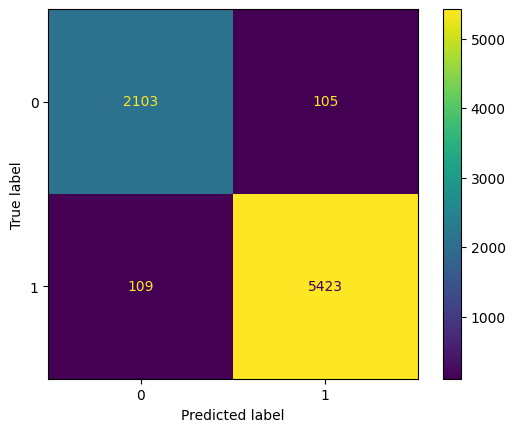

---------------------------------------------------------------------------------------------------------------
Model: RandomForestClassifier(max_depth=3, random_state=42)
Accuracy: 95.25
Recall: 0.9486623282718727
Precision: 0.9842460615153789
F1-Score: 0.9661266568483063
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.882     0.962     0.920      2208
           1      0.984     0.949     0.966      5532

    accuracy                          0.952      7740
   macro avg      0.933     0.955     0.943      7740
weighted avg      0.955     0.952     0.953      7740

Confusion_Matrix
---------------------


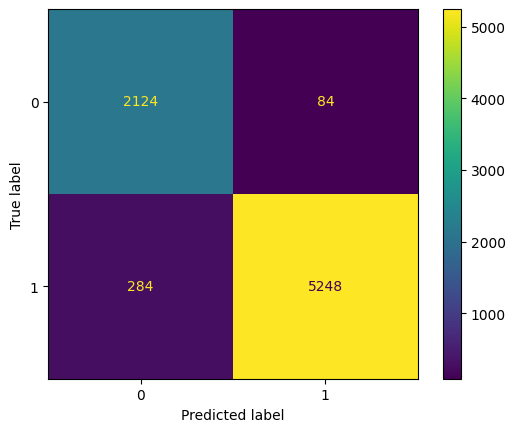

---------------------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier(n_neighbors=7)
Accuracy: 98.9
Recall: 0.9878886478669558
Precision: 0.9967171256611345
F1-Score: 0.9922832501134817
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.970     0.992     0.981      2208
           1      0.997     0.988     0.992      5532

    accuracy                          0.989      7740
   macro avg      0.984     0.990     0.987      7740
weighted avg      0.989     0.989     0.989      7740

Confusion_Matrix
---------------------


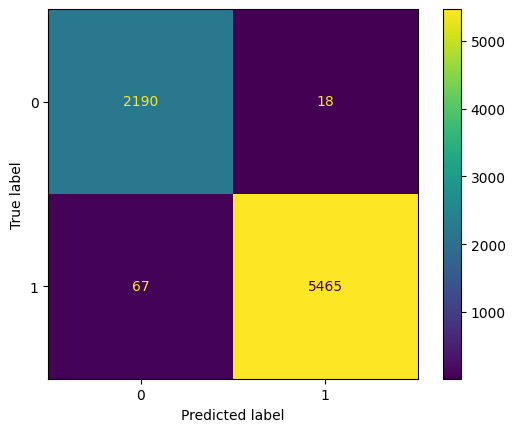

---------------------------------------------------------------------------------------------------------------
Model: GaussianNB()
Accuracy: 94.26
Recall: 0.9441431670281996
Precision: 0.9748040313549832
F1-Score: 0.959228650137741
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.870     0.939     0.903      2208
           1      0.975     0.944     0.959      5532

    accuracy                          0.943      7740
   macro avg      0.923     0.942     0.931      7740
weighted avg      0.945     0.943     0.943      7740

Confusion_Matrix
---------------------


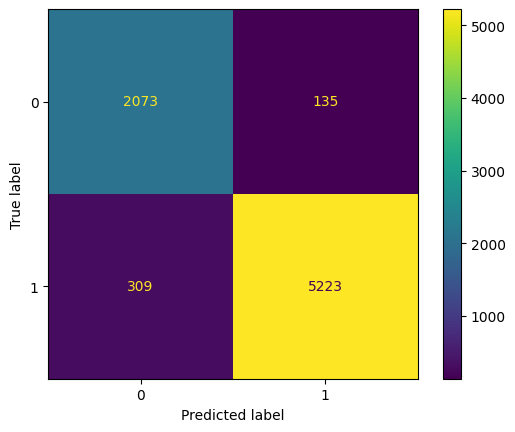

---------------------------------------------------------------------------------------------------------------


In [32]:
result_df = modelling(x_train_smote, x_test_pca, y_train_smote, y_test)


In [33]:
result_df

,Recall,Precision,F1_Score,Accuracy
KNeighborsClassifier,0.987889,0.996717,0.992283,0.989018
DecisionTreeClassifier,0.980296,0.981006,0.980651,0.972351
RandomForestClassifier,0.948662,0.984246,0.966127,0.952455
GaussianNB,0.944143,0.974804,0.959229,0.942636


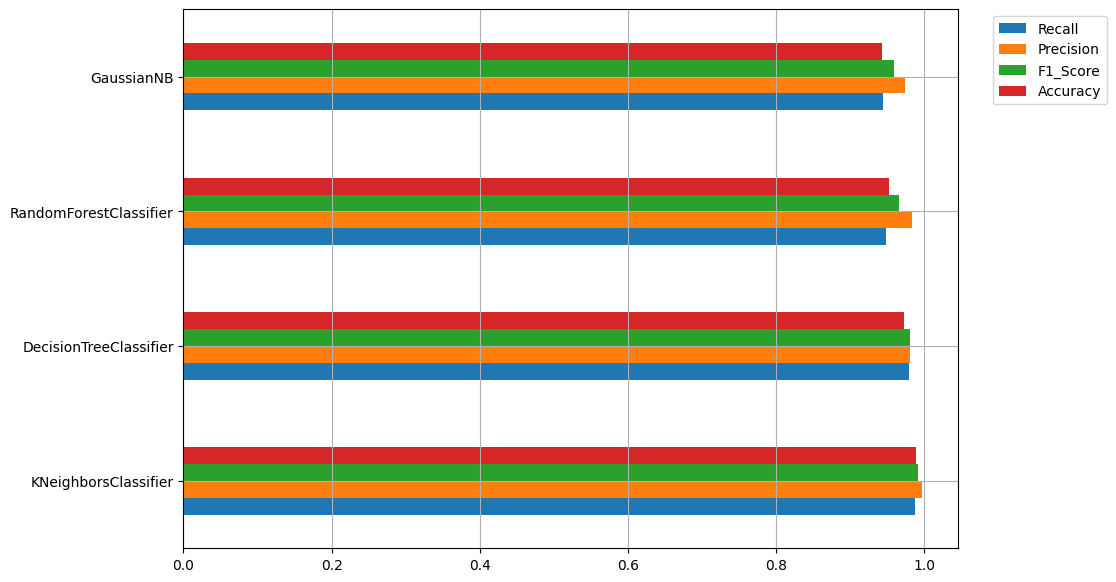

In [34]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2, 1))
plt.show()